# VARIABLE DESCRIPTIONS:
*   survival        Survival
                (0 = No; 1 = Yes)
*   pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)
*   name            Name
*   sex             Sex
*   age             Age
*   sibsp           Number of Siblings/Spouses Aboard
*   parch           Number of Parents/Children Aboard
*   ticket          Ticket Number
*   fare            Passenger Fare
*   cabin           Cabin
*   embarked        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)

### SPECIAL NOTES:
Pclass is a proxy for socio-economic status (SES)
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

Age is in Years; Fractional if Age less than One (1)
 If the Age is Estimated, it is in the form xx.5

With respect to the family relation variables (i.e. sibsp and parch)
some relations were ignored.  The following are the definitions used
for sibsp and parch.

*   Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic

*   Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)

*   Parent:   Mother or Father of Passenger Aboard Titanic

*   Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

Other family relatives excluded from this study include cousins,
nephews/nieces, aunts/uncles, and in-laws.  Some children travelled
only with a nanny, therefore parch=0 for them.  As well, some
travelled with very close friends or neighbors in a village, however,
the definitions do not support such relations.

In [1]:
import pandas as pd

In [2]:
titanic_df = pd.read_csv('titanic-data.csv')

In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#how many male and female passengers survived?
print titanic_df.groupby(['Sex']).sum()['Survived']

Sex
female    233
male      109
Name: Survived, dtype: int64


In [24]:
#which age group had the most survival rate?
#Remove those entries which do not have any age given
total_byage = titanic_df.groupby(['Age']).count()['PassengerId']
#print total_byage

In [25]:
total_bysurv = titanic_df.groupby(['Age','Survived']).count()['PassengerId']
#print total_bysurv

In [36]:
percentage_survival = (total_bysurv/total_byage) * 100
survival_percentage.head()
s1 = survival_percentage.head(30)
#select only those entries where survival=1

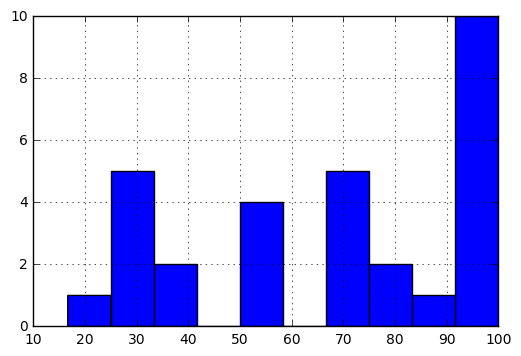

In [39]:
s1.hist()

Populating the interactive namespace from numpy and matplotlib


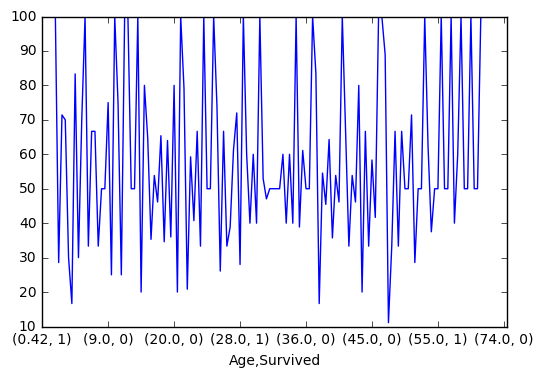

In [37]:
%pylab inline
percentage_survival.plot()

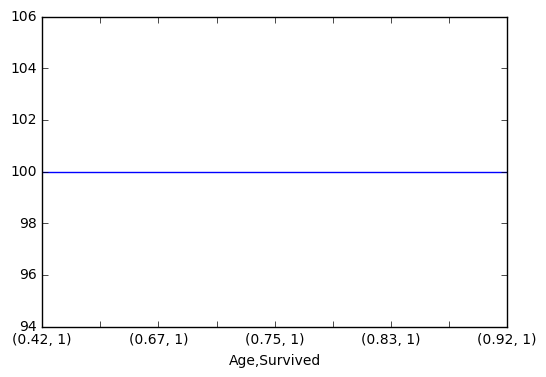

In [6]:
#what percentage of the different Pclass survived?
survival_pclass = titanic_df.groupby(['Survived','Pclass']).count()['PassengerId']
print survival_pclass

Survived  Pclass
0         1          80
          2          97
          3         372
1         1         136
          2          87
          3         119
Name: PassengerId, dtype: int64


In [7]:
total_pclass = titanic_df.groupby(['Pclass']).count()['PassengerId']
print total_pclass

Pclass
1    216
2    184
3    491
Name: PassengerId, dtype: int64


In [8]:
percentage_survival = (survival_pclass/total_pclass) * 100
print percentage_survival

Survived  Pclass
0         1         37.037037
          2         52.717391
          3         75.763747
1         1         62.962963
          2         47.282609
          3         24.236253
Name: PassengerId, dtype: float64


Populating the interactive namespace from numpy and matplotlib


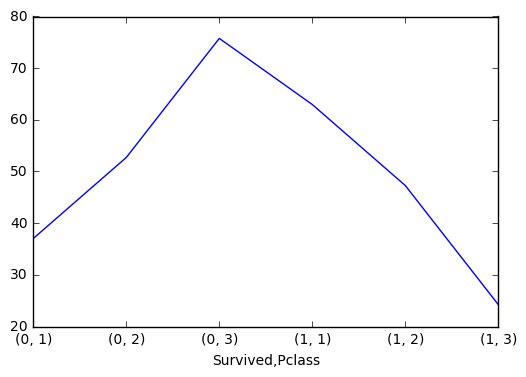

In [12]:
%pylab inline
#import seaborn as sns
percentage_survival.plot()

In [ ]:
#People from which embarking point had purchased the costliest tickets?
print titanic_df.groupby(['Embarked','Pclass']).count()

#How many people with siblings did not survive?